In [1]:
def show_stars(rows) :
    star = 0
    i = 0
    sign = "*"
    while (star < rows) :
        while (i < star) :
            sign+='*'
            i+=1
        print(sign)
        star+=1

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
def script_read_txt(year_from,year_to):   
    data = pd.DataFrame()
    data1 = pd.DataFrame(data,columns=['Name','Sex','Number','Year'])
    next_year = year_from
    while(next_year <= year_to):
        path = 'C:\\Users\\PC\\OneDrive\\Documents\\Names\\yob'
        path += str(next_year)+'.txt'
        while (year_from <= next_year):           
            data = pd.read_csv(path,header=None,names=['Name','Sex','Number','Year'])
            data['Year'] = year_from
            year_from += 1
        data1 = data1.merge(data,how='outer')
        next_year += 1
    return(data1)

In [151]:
Data_born = script_read_txt(1880,2018)
Data_born

,Name,Sex,Number,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


In [131]:
data = Data_born.groupby(['Year','Sex']).Number.sum().to_frame()
data

Number
Year Sex         
1880 F      90994
     M     110490
1881 F      91953
     M     100743
1882 F     107847
...           ...
2016 M    1891585
2017 F    1719138
     M    1842837
2018 F    1686961
     M    1800392

[278 rows x 1 columns]

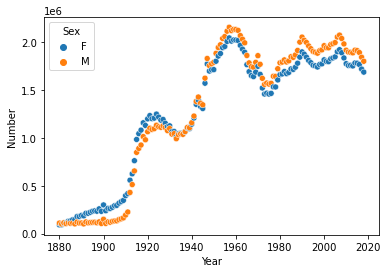

In [132]:
sns.scatterplot(data = data, x='Year', y= 'Number', hue = 'Sex');

In [133]:
Data_born.set_index('Name',inplace=True)

In [134]:
top_1000_name = Data_born.groupby(['Sex','Year']).Number.nlargest(1000).to_frame()
top_1000_name

Number
Sex Year Name             
F   1880 Mary         7065
         Anna         2604
         Emma         2003
         Elizabeth    1939
         Minnie       1746
...                    ...
M   2018 Korbyn        207
         Randall       207
         Benton        206
         Coleman       206
         Markus        206

[277877 rows x 1 columns]

In [180]:
No_born_by_name = Data_born.query("Name in ('Philip','Harry', 'Elizabeth', 'Marilyn')").groupby(['Year','Name']).Number.sum().to_frame()

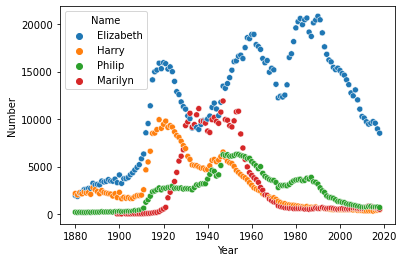

In [186]:
sns.scatterplot(data=No_born_by_name,x='Year',y='Number',hue='Name');